In [1]:
## Clone the Github Repo

import shutil
import os, sys
import json

shutil.rmtree('/content/cen_sierra_pywr_new', ignore_errors=True)
!git clone https://github.com/Maburidi/cen_sierra_pywr_new.git
sys.path.insert(0,'/content/cen_sierra_pywr_new/')

%cd /content/cen_sierra_pywr_new/


Cloning into 'cen_sierra_pywr_new'...
remote: Enumerating objects: 16502, done.
remote: Counting objects: 100% (1110/1110), done.
remote: Compressing objects: 100% (603/603), done.
remote: Total 16502 (delta 962), reused 507 (delta 507), pack-reused 15392 (from 5)
Receiving objects: 100% (16502/16502), 1012.99 MiB | 14.92 MiB/s, done.
Resolving deltas: 100% (7573/7573), done.
Updating files: 100% (1781/1781), done.
/content/cen_sierra_pywr_new


In [2]:
# Install Pywr

!bash install_dependencies.sh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 30.9 MB/s eta 0:00:00


In [29]:
# Run the Model


################## RESULTS ######################

# A folder called "results" will be created, where the results will be stored. Similar thing for loggs

################# Arguments #####################

# -b: ['stanislaus', 'tuolumne', 'merced', 'upper_san_joaquin']
# -s : starting year: gcms: 2006  , loca2_gcms: 2015      Livenh: 1990
# -e : end year:      gcms: 2099  , loca2_gcms: 2099      Livenh: 1992
# -p: include planning: [0,1] for stanislaus, 0 for the rest
# -n: runname
# -d: Debug mode: [0,1], 1 to see more details for development
# -sc:  Scenario set. ['debug','natural_flow', 'gcms', 'loca2_gcms']
#         Scenario working so far: 1- 'debug'
#                                  2- 'natural_flow'
#                                  3- 'gcms' --- only: tuolumne CCSM4_rcp85
# -gm: gcms models, if its   ['CCSM4_rcp85',]
# -lgm: LOCA2 gcms models    [ACCESS_CM2, ]

#======= CL arguments for Planning mode ---
# -m: Planning months, default 8,
# -bl: Number of piecewise blocks, default 5




################# RUN SCENARIOS ###################

#Examples: uncomment the line to run the scenario you prefer:

#[A] LOCA2 GCMS

#!python main.py -b 'stanislaus' -s 2015 -e 2099 -d 0 -p 1 -sc 'loca2_gcms' -lgm 'ACCESS_CM2'
#!python main.py -b 'tuolumne' -s 2015 -e 2099 -d 1 -sc 'loca2_gcms' -lgm 'ACCESS_CM2'


#[B] GCMS
#!python main.py -b 'stanislaus' -s 2015 -e 2099 -d 1 -p 1 -sc 'gcms' -gm 'ACCESS1_0_rcp85'
#!python main.py -b 'tuolumne' -s 2015 -e 2099 -d 1 -sc 'gcms' -gm 'CCSM4_rcp85'


#[C] Livenh Historical natural_flow

!python main.py -b 'tuolumne' -s 1990 -e 1992 -d 0 -sc 'natural_flow'
#!python main.py -b 'merced' -s 1990 -e 1992 -d 1 -sc 'natural_flow'                           # gives an error due to bad inputs
#!python main.py -b 'stanislaus' -s 1990 -e 1992 -d 0 -p 1 -sc 'natural_flow'                  # gives error when runnning the planining
#!python main.py -b 'upper_san_joaquin' -s 1990 -e 1992 -d 1 -p 1 -sc 'natural_flow'           # gives error when runnning the planining





2025-02-04 23:41:17.202 | INFO     | sierra.run_basin_model:_run_model:79 - Running "Natural Flow" scenario for TUOLUMNE basin, HISTORICAL/LIVNEH climate
2025-02-04 23:41:17.212 | INFO     | sierra.run_basin_model:_run_model:227 - Parameters Imported
2025-02-04 23:41:17.221 | INFO     | sierra.run_basin_model:_run_model:244 - tuolumne Policy Parameters Imported
2025-02-04 23:41:17.224 | INFO     | sierra.run_basin_model:_run_model:356 - Loading daily model
2025-02-04 23:41:17.734 | INFO     | sierra.run_basin_model:_run_model:362 - Daily Model Loaded Successfully
2025-02-04 23:41:17.735 | INFO     | sierra.run_basin_model:_run_model:364 - Setup Daily Model
/usr/local/lib/python3.11/dist-packages/pywr/dataframe_tools.py:127: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  new_df = new_df.resample(target_index.freq).agg(resample_func)
/usr/local/lib/python3.11/dist-packages/pywr/dataframe_tools.py:140: FutureWarning: Re

In [ ]:
        sjvi = self.model.tables["San Joaquin Valley Index"]
        if 4 <= self.datetime.month <= 12:
            operational_water_year = self.datetime.year

        else:
            operational_water_year = self.datetime.year - 1

        return sjvi.loc[operational_water_year, 'SJVI (maf)']


In [ ]:
RIM_DAMS = {
    'stanislaus': 'New Melones Lake',
}

PARAMETERS_TO_EXPAND = {
    'stanislaus': [
        'New Melones Apr-Jul Runoff',
        # 'New Melones Lake/Water Year Type',
        'New Melones Lake/Storage Demand'
    ],
    'common': [
        'San Joaquin Valley WYT',
        'San Joaquin Valley WYI'
    ]
}

PARAMETERS_TO_REMOVE = {
    'stanislaus': [
        'New Melones Lake/Water Year Type'
    ]
}

In [ ]:
from sierra.utilities import simplify_network

basin = 'stanislaus'
climate = 'ACCESS1_0_RCP85'
planning_months = 2
remove_rim_dams = True

model_path = '/content/cen_sierra_pywr_new/sierra/models/stanislaus/temp/pywr_model_updated_ACCESS1_0_rcp85.json'

with open(model_path, 'r') as f:
    model_json = json.load(f)


parameters_to_expand = PARAMETERS_TO_EXPAND.get(basin, []) + PARAMETERS_TO_EXPAND.get('common', [])
m = simplify_network(model_json, basin=basin, climate=climate, delete_gauges=True, delete_observed=True, delete_scenarios=False)


ModuleNotFoundError: No module named 'sierra'

In [ ]:

num_scenarios = 1
for scenario in m.get('scenarios', []):
    num_scenarios *= scenario['size']
steps = planning_months
all_steps = range(steps)



new_nodes = []
new_edges = []
new_parameters = {}
new_recorders = {}

updated_node_names = {}

gauges = {}
parameters_to_expand = parameters_to_expand or []
parameters_to_delete = []
black_list = ['max_volume']
storage_recorders = {}


if remove_rim_dams:
    rim_dam = RIM_DAMS.get(basin)
    parameters_to_remove = PARAMETERS_TO_REMOVE.get(basin, [])
    downstream_nodes = []
    downstream_edges = []
    finished = False
    while not finished:
        finished = True
        for n1, n2 in m['edges']:
            if (n1 == rim_dam or n1 in downstream_nodes) and n2 not in downstream_nodes:
                downstream_nodes.append(n2)
                finished = False
    m['nodes'] = [n for n in m['nodes'] if n['name'] not in downstream_nodes]
    m['edges'] = [e for e in m['edges'] if e[1] not in downstream_nodes and e[0]]
    for section in ['parameters', 'recorders']:
        keys = list(m[section].keys())
        for key in keys:
            parts = key.split('/')
            if len(parts) > 1 and parts[0] in downstream_nodes:
                del m[section][key]

            if section == 'parameters' and key in parameters_to_remove:
                del m[section][key]

    for i, n in enumerate(m['nodes']):
        if n['name'] == rim_dam:
            m['nodes'][i] = {
                'name': rim_dam,
                'type': 'Output',
                'cost': 1
            }
            break


for node in m['nodes']:
    old_name = node['name']
    node_type = node['type']

    node.pop('gauge', None)

    for key, value in node.items():
        if key in black_list:
            continue
        if node_type == 'Reservoir' and key == 'cost':
            continue
        if type(value) == str and value in m['parameters']:
            if value not in parameters_to_expand:
                parameters_to_expand.append(value)

    res_class = 'network'
    res_name = old_name
    metadata = json.loads(node.get('comment', '{}'))
    node['comment'] = json.dumps(metadata)

    for step in all_steps:
        t = step + 1
        new_node = node.copy()
        new_res_name = '{}/{}'.format(old_name, t)
        new_node['name'] = new_res_name
        month = '/{}'.format(t)





In [ ]:
file_path = '/content/cen_sierra_pywr_new/sierra/models/stanislaus/temp/out.json'

with open(file_path, 'w') as json_file:
    json.dump(m, json_file, indent=4)



In [ ]:
            new_node = node.copy()
            new_res_name = '{}/{}'.format(old_name, t)
            new_node['name'] = new_res_name

            month = '/{}'.format(t)
            t =0



In [ ]:
node = m['nodes'][22]  # 17, 20
#node
step =0
new_nodes = []
old_name = node['name']
t = step + 1
new_node = node.copy()
new_res_name = '{}/{}'.format(old_name, t)
new_node['name'] = new_res_name

month = '/{}'.format(t)
black_list = ['max_volume']
blocks = 5
res_name = old_name

NameError: name 'm' is not defined

In [ ]:
                for key, value in node.items():

                    if type(value) == str and value in m['parameters']:
                        if key not in black_list:
                            new_node[key] += month
                            if value not in parameters_to_expand:
                                parameters_to_expand.append(value)

                    elif type(value) in [float, int]:
                        if key in ["max_flow", "turbine_capacity"]:
                            # TODO: convert capacities to formulas w/ day-month conversion
                            new_node[key] *= 30

                    elif type(value) == list:
                        new_values = []
                        for j, v in enumerate(value):

                            if type(v) == str and v != None :

                                if v not in parameters_to_expand:
                                    parameters_to_expand.append(v)
                                parts = v.split('/')
                                if j == 0 or len(parts) == 2:
                                    for b in range(blocks):
                                        if len(parts) == 2:
                                            # no block-specific value, but still need to expand to number of blocks
                                            new_values.append(v + month)
                                            break
                                        elif len(parts) == 3:
                                            # there are block-specific parameters
                                            attr = parts[-2]
                                            # note the scheme: resource name / attribute / block / month
                                            new_v = '{}/{}/{}/{}'.format(res_name, attr, b + 1, t)
                                            new_values.append(new_v)
                            else:
                                new_values.append(v)
                        new_node[key] = new_values



                        if len(new_node['max_flows']) != len(new_node['costs']):
                            if len(new_node['max_flows']) > len(new_node['costs']):
                                if None in new_node['max_flows']:
                                    new_node['max_flows'] = [x for x in new_node['max_flows'] if x is not None]
                                else:
                                    new_node['max_flows'] = new_node['max_flows'][:len(new_node['costs'])]
                            else:
                                if None in new_node['costs']:
                                    new_node['costs'] = [x for x in new_node['costs'] if x is not None]   # Remove None
                                else:
                                    new_node['costs'] = new_node['costs'][:len(new_node['max_flows'])]

                    if key == 'nsteps':
                        new_node[key] = int(max(len(new_node['max_flows']), len(new_node['costs'])))


                new_nodes.append(new_node)


In [ ]:
new_nodes

In [ ]:
import json
from sierra.utilities import simplify_network
import numpy as np




    for node in m['nodes']:

        for step in all_steps:
            new_nodes = []
            t = step + 1
            new_node = node.copy()
            new_res_name = '{}/{}'.format(old_name, t)
            new_node['name'] = new_res_name

            month = '/{}'.format(t)

            if node_type == 'Reservoir' and node.get('max_volume'):
                # 1. rename and empty storage for original storage node
            else:
                for key, value in node.items():

                    if type(value) == str and value in m['parameters']:
                        if key not in black_list:
                            new_node[key] += month
                            if value not in parameters_to_expand:
                                parameters_to_expand.append(value)

                    elif type(value) in [float, int]:
                        if key in ["max_flow", "turbine_capacity"]:
                            # TODO: convert capacities to formulas w/ day-month conversion
                            new_node[key] *= 30

                    elif type(value) == list:
                        new_values = []
                        for j, v in enumerate(value):

                            if type(v) == str and v != 'null' :

                                if v not in parameters_to_expand:
                                    parameters_to_expand.append(v)
                                parts = v.split('/')
                                if j == 0 or len(parts) == 2:
                                    for b in range(blocks):
                                        if len(parts) == 2:
                                            # no block-specific value, but still need to expand to number of blocks
                                            new_values.append(v + month)
                                            break
                                        elif len(parts) == 3:
                                            # there are block-specific parameters
                                            attr = parts[-2]
                                            # note the scheme: resource name / attribute / block / month
                                            new_v = '{}/{}/{}/{}'.format(res_name, attr, b + 1, t)
                                            new_values.append(new_v)
                            else:
                                new_values.append(v)
                        new_node[key] = new_values

                    if key == 'nsteps':
                        new_node[key] = int(np.max(len(new_node['max_flows']), len(new_node['costs'])))


                new_nodes.append(new_node)

    edges_temp = []
    for n1, n2 in m['edges']:
        if n1 in gauges:
            gauges[n1][1] = n2
        elif n2 in gauges:
            gauges[n2][0] = n1
        else:
            edges_temp.append([n1, n2])
    edges_temp += list(gauges.values())

    for n1, n2 in edges_temp:
        # for n1, n2 in m['edges']:
        for step in all_steps:
            t = step + 1
            new_n1 = '{}/{}'.format(n1, t)
            new_n2 = '{}/{}'.format(n2, t)
            new_edges.append([
                updated_node_names.get(new_n1, new_n1),
                updated_node_names.get(new_n2, new_n2),
            ])

    block_params_expanded = []

    for param_name, param in m['parameters'].items():
        if 'control_curves' in param:
            for cc in param['control_curves']:
                if type(cc) == str and cc not in parameters_to_expand:
                    parameters_to_expand.append(cc)

    for param_name in m['parameters']:

        if param_name in parameters_to_delete:
            continue

        # Delete storage value (at least for now)
        # if '/Storage Value' in param_name:
        #     continue

        parts = param_name.split('/')
        param = m['parameters'][param_name]
        res_name = None
        attribute = None
        block = None
        if len(parts) == 1:
            attribute = parts[0]
        elif len(parts) == 2:
            res_name, attribute = parts
        elif len(parts) == 3:
            res_name, attribute, block = parts
            block = int(block)

        if attribute in ['Observed Flow', 'Observed Storage', 'Elevation']:
            continue

        if param_name in parameters_to_expand or 'node' in param:
            for step in all_steps:
                t = step + 1
                month_suffix = '/{}'.format(t)
                if block:
                    # check if we've already expanded this
                    block_param = (res_name, attribute, t)
                    if block_param in block_params_expanded:
                        continue  # continue if we have
                    block_params_expanded.append(block_param)

                new_param = param.copy()
                if attribute == 'Runoff':
                    new_param['url'] = new_param['url'].replace('/runoff_aggregated/', '/runoff_monthly_forecasts/')
                    new_param['column'] = '{:02}'.format(t)
                    # new_param['parse_dates'] = False
                elif attribute == 'Turbine Capacity':
                    if new_param['type'] == 'constant':
                        # TODO: come up with a better method for converting PH capacity
                        # should be in custom class or table lookup
                        new_param['value'] *= 30
                if 'node' in param:
                    new_param['node'] += month_suffix
                if 'storage_node' in param:
                    new_param['storage_node'] += month_suffix
                if 'control_curves' in param:
                    new_param['control_curves'] = []
                    for control_curve in param['control_curves']:
                        if isinstance(control_curve, str):
                            new_param['control_curves'].append(control_curve + month_suffix)
                        else:
                            new_param['control_curves'].append(control_curve)

                if block:
                    for b in range(blocks):
                        new_param_name = '/'.join([res_name, attribute, str(b + 1), str(t)])
                        new_parameters[new_param_name] = new_param
                else:
                    if res_name and attribute:
                        new_param_name = '/'.join([res_name, attribute, str(t)])
                    else:
                        new_param_name = '/'.join([attribute, str(t)])
                    new_parameters[new_param_name] = new_param
            continue

        new_parameters[param_name] = param

    new_tables = {}
    for table_name, table in m.get('tables', {}).items():
        if 'observed' in table_name.lower():
            continue
        if 'url' in table:
            table['url'] = table['url'].replace('daily', 'monthly')
        new_tables[table_name] = table

    if debug:
        for n in new_nodes:
            node_name = n['name']
            parts = node_name.split('/')
            month = int(parts[1]) if len(parts) > 1 else None
            node_type = n['type']
            if node_type == 'VirtualStorage':
                new_recorders[node_name.replace('/', '/{}/'.format('storage'))] = {
                    'type': 'NumpyArrayStorageRecorder',
                    'node': node_name,
                    # 'comment': node_type
                }
            elif 'hydropower' in node_type.lower():

                # flow
                recorder_name = node_name.replace('/', '/{}/'.format('flow'))
                new_recorders[recorder_name] = {
                    'type': 'NumpyArrayNodeRecorder',
                    'node': node_name,
                    # 'comment': node_type
                }

    m['nodes'] = new_nodes
    m['edges'] = new_edges
    m['tables'] = new_tables
    m['parameters'] = new_parameters
    m['recorders'] = new_recorders

    with open(outpath, 'w') as f:
        json.dump(m, f, indent=4)
    return



IndentationError: unexpected indent (<ipython-input-183-ca7ffc10567a>, line 8)

In [ ]:
############################## MODEL COMPONENTS #################################

import json
#print(json.dumps(base_model, indent=4))

basin = 'tuolumne'        #  ['stanislaus', 'tuolumne', 'merced', 'upper_san_joaquin']
'''
Model Components:
  0- metadata
  00- timestepper
  000- solver
  1- Nodes
  2- Edges
  3- tables
  4- scenarios
  5- parameters
  6- Recorders
'''

model_path = '/content/cen_sierra_pywr_new/sierra/models/' + basin + '/pywr_model_updated.json'

with open(model_path, 'r') as f:
    base_model = json.load(f)

nodes_data = base_model.get('nodes', [])
edges_data = base_model.get('edges', [])
tables_data = base_model.get('tables', [])
scenarios_data = base_model.get('scenarios', [])
parameters_data = base_model.get('parameters', [])
Recorders_data = base_model.get('recorders', [])


print(f'Number of Nodes = {len(nodes_data)}')
print(f'Number of Edges = {len(edges_data)}')
print(f'Number of Tabels = {len(tables_data)}')
print(f'Number of Scenarios = {len(scenarios_data)}')
print(f'Number of Parameters = {len(parameters_data)}')
print(f'Number of Recorders = {len(Recorders_data)}')


Number of Nodes = 44
Number of Edges = 55
Number of Tabels = 13
Number of Scenarios = 0
Number of Parameters = 45
Number of Recorders = 43


In [ ]:
##################### NODES ######################
index = 1
print(f'Example of a Node = {nodes_data[index]}')

node_types = []
for i in range(len(nodes_data)):
    node_types.append(nodes_data[i].get('type'))

node_types = list(set(node_types))
print(f'type of existing nodes = {node_types}')

################### EDGES ####################
print(f'Example of an Edge = {edges_data[0]}')

Example of a Node = {'name': 'Upper Hetch Hetchy Tunnel Outflow Inflow', 'type': 'Catchment', 'comment': '{"resource_class": "node"}', 'flow': 'Upper Hetch Hetchy Tunnel Outflow Inflow/Runoff'}
type of existing nodes = ['Output', 'BreakLink', 'Catchment', 'Link', 'InstreamFlowRequirement', 'River', 'Reservoir', 'Hydropower', 'PiecewiseLink']
Example of an Edge = ['Hetch Hetchy Aquaduct Outflow', 'Below Hetch Hetchy Aquaduct Diverted Inflow']


In [ ]:
################### TABLES ###################
print(f'All Tables = {list(tables_data.keys())}')

print(f'Example of a Table name = {list(tables_data.keys())[0]}')
print(f'Example of a Table contents = {list(tables_data.values())[0]}')


All Tables = ['functional flows metrics', 'Annual Full Natural Flow', 'San Joaquin Valley Index', 'Modesto Irrigation District/Demand Table', 'Turlock Irrigation District/Demand Table', 'SFPUC weekly fraction', 'Don Pedro Lake Flood Control Curve', 'Preferred Storage', 'Lake Eleanor Pumping Thresholds', 'IFR at La Grange/IFR Schedule', 'IFR bl Hetch Hetchy Reservoir/IFR Schedule', 'IFR bl Hetch Hetchy Reservoir/UTREP hydrographs', 'IFR bl Lake Eleanor/IFR Schedule']
Example of a Table name = functional flows metrics
Example of a Table contents = {'url': '/content/cen_sierra_pywr/data/Tuolumne_River/_tables/Functional_Flows_metrics.csv', 'index_col': 0, 'header': 0}


In [ ]:
############################### PARAMETERS ##############################
print(f'All PARAMETERS = {list(parameters_data.keys())}')
print(f'Number of Papramters = { len(list(parameters_data.keys()))}')

index = 1
print(f'Example of a PARAMETER name = {list(parameters_data.keys())[index]}')
print(f'Example of a PARAMETER contents = {list(parameters_data.values())[index]}')



All PARAMETERS = ['Price Year', 'Full Natural Flow', 'Dion R Holm PH/Demand', 'Don Pedro Lake Flood Control/Requirement', 'Water Bank', 'Eleanor-Cherry Pumping/Requirement', 'Eleanor-Cherry Gravity/Requirement', 'Cherry Lake/Cost', 'Cherry Lake/Elevation', 'Districts Entitlements', 'Don Pedro Reservoir/Cost', 'Don Pedro Reservoir/Elevation', 'Hetch Hetchy Reservoir/Cost', 'Hetch Hetchy Reservoir/Precipitation', 'Hetch Hetchy Reservoir/Elevation', 'IFR bl Cherry Lake/Min Flow', 'IFR at La Grange/Water Year Type', 'IFR at La Grange/Min Flow', 'IFR bl Hetch Hetchy Reservoir/Water Year Type', 'IFR bl Hetch Hetchy Reservoir/Base Flow', 'IFR bl Hetch Hetchy Reservoir/Min Flow', 'IFR bl Hetch Hetchy Reservoir/UTREP Spill', 'IFR bl Lake Eleanor/Min Flow', 'Kirkwood PH/Demand', 'Lake Eleanor/Cost', 'Lake Eleanor/Elevation', 'Lake Eleanor/Forecasted Inflow', 'Lower Cherry Aqueduct 1/Flow Requirement', 'Modesto Irrigation District/Demand', 'SFPUC requirement/Demand Reduction', 'SFPUC requirement/

In [ ]:
############################### RECORDERS ###############################
print(f'All Recorders = {list(Recorders_data.keys())}')
print(f'Number of Recorders = { len(list(Recorders_data.keys()))}')

index = 0
print(f'Example of a Recorders name = {list(Recorders_data.keys())[index]}')
print(f'Example of a Recorders contents = {list(Recorders_data.values())[index]}')

recorders_types = []
rec_values = list(Recorders_data.values())
for i in range(len(rec_values)):
    recorders_types.append(rec_values[i].get('type'))
recorders_types = list(set(recorders_types))
print(f'type of existing recoreders = {recorders_types}')



All Recorders = ['Cherry Lake/storage', 'Cherry Lake/elevation', 'Districts Entitlements/flow', 'Dion R Holm PH/energy', 'Dion R Holm PH/flow', 'Don Pedro Lake Spillway/flow', 'Don Pedro PH/energy', 'Don Pedro PH/flow', 'Don Pedro Lake Flood Control/flow', 'Don Pedro Lake Flood Control/requirement', 'Don Pedro Reservoir/elevation', 'Don Pedro Reservoir/storage', 'Water Bank/storage', 'Eleanor-Cherry Pumping/flow', 'Eleanor-Cherry Gravity/flow', 'Groveland/flow', 'Hetch Hetchy Reservoir/storage', 'IFR bl Cherry Lake/flow', 'IFR bl Cherry Lake/min flow', 'IFR at La Grange/flow', 'IFR at La Grange/min flow', 'IFR at La Grange/water year type', 'IFR bl Hetch Hetchy Reservoir/flow', 'IFR bl Hetch Hetchy Reservoir/min flow', 'IFR bl Hetch Hetchy Reservoir/base flow', 'IFR bl Hetch Hetchy Reservoir/water year type', 'IFR bl Lake Eleanor/flow', 'IFR bl Lake Eleanor/min flow', 'Moccasin Fish Hatchery/flow', 'Kirkwood PH/energy', 'Kirkwood PH/flow', 'Lake Eleanor/storage', 'Lake Eleanor/elevatio

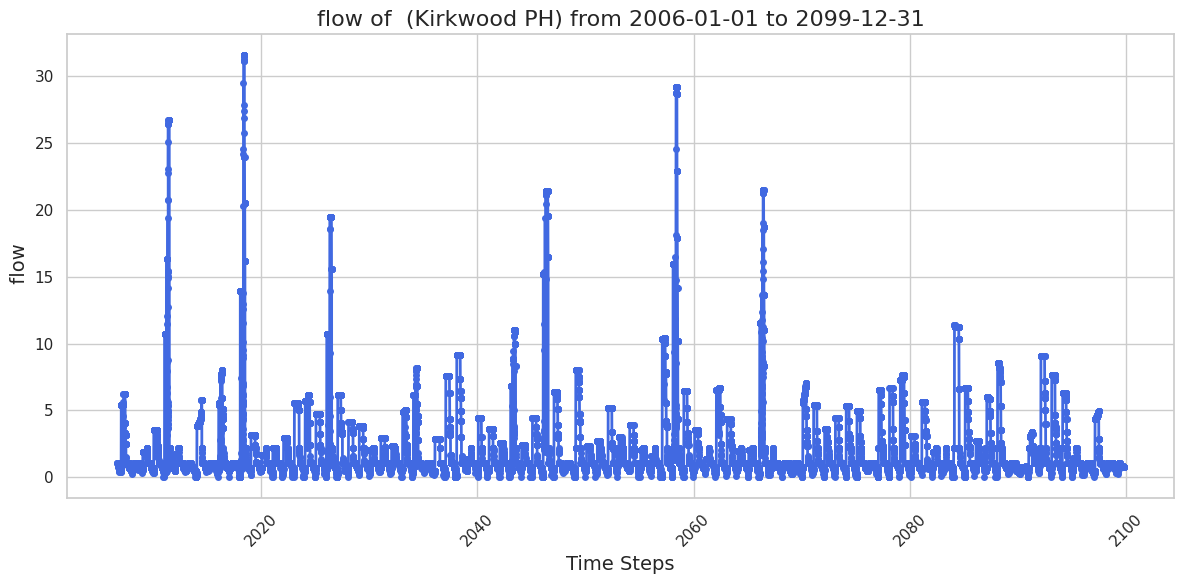

In [ ]:
################################# VISUALIZATION ###################################################
###################################################################################################


# PLOT: storage, elevation, flow, energy, requirement, min flow, water year type, base flow, demand   for each node

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

index = 30
basin = 'tuolumne'                #['stanislaus', 'tuolumne', 'merced', 'upper_san_joaquin']
scen = 'development'
start_date = '2006-01-01'
end_date = '2099-12-31'
gcm_name = 'CCSM4_rcp85'

all_rec = list(Recorders_data.keys())
node, attribute = all_rec[index].split("/")

res_file = os.path.join('/content/cen_sierra_pywr_new/results', 'all_recorders_output1.csv')

df = pd.read_csv(res_file)

sns.set(style="whitegrid")

df['Date'] = pd.to_datetime(df['Date'])

filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date'], filtered_df[node], marker='o', color="royalblue", linewidth=2, markersize=4)

plt.title(f"{attribute} of  ({node}) from {start_date} to {end_date}", fontsize=16)
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel(f" {attribute}", fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/content/cen_sierra_pywr_new/results/" + node +'_reco.png', format="png", dpi=300)  # Save as PNG with 300 DPI for quality

plt.show()


In [ ]:
#### functions for the next figures


def create_basic_charts(variable, figname=None):
    df = pd.DataFrame()
    for basin in basins:
        climate_dfs = []
        print('Processing {}'.format(basin))
        for climate in climates:
            climate_dir = join(climates_dir, basin, climate)

            if variable == 'Hydropower_Generation_MWh':
                variable_path = join(climate_dir, 'Hydropower_Flow_mcm.csv')
            else:
                variable_path = join(climate_dir, variable + '.csv')

            _df = read_csv(variable_path)
            _df.index.name = 'date'

            if variable == 'Hydropower_Generation_MWh':

                # Calculate energy in MWh from energy equation:
                # P = rho * g * Q * h * eta
                # P = power (Joules?)
                # rho = density (1000 kg/m^3); assume constant
                # g = gravitational constant (9.81 m/s^2); assume constant
                # Q = flowrate (m^3/s); variable
                # h = head (m); could be fixed or variable
                # eta = efficiency (assume 0.85 for now)

                # E = P * 24 / 1e6 (double check) - convert from Joules/second to MWh (per day)

                # load model
                model_path = '../../{}/pywr_model.json'.format(basin)
                with open(model_path) as f:
                    model = json.load(f)

                # get elevations
                elev_path = join(climate_dir, 'Reservoir_Elevation_m.csv')
                if os.path.exists(elev_path):
                    elev = read_csv(elev_path)
                else:
                    elev = None

                keepers = []
                eta = 0.85
                gamma = 9810  # = rho * g = 1000 * 9.81
                nodes = {n['name']: n for n in model['nodes']}
                for ph in _df:
                    node = nodes[ph]
                    Q = _df[ph] / 0.0864  # convert to mcm
                    h = node.get('head', NODES.get(ph, {}).get('head'))  # m
                    if type(h) == str and elev is not None:
                        h = elev.get(h)
                    elif type(h) not in [int, float]:
                        h = None
                    if h is None:
                        continue
                    keepers.append(ph)
                    Qmax = node.get('turbine_capacity')  # cms
                    if type(Qmax) not in [int, float]:
                        Qmax = NODES.get(ph, {}).get('turbine_capacity', 0)
                    Q = Q.map(lambda q: min(q, Qmax))
                    MWh = eta * gamma * Q * h * 24 / 1e6
                    _df[ph] = MWh

                _df = _df[keepers]

            _df['climate'] = climate
            _df.reset_index(inplace=True)
            _df.set_index(['date', 'climate'], inplace=True)
            climate_dfs.append(_df)
        basin_df = pd.concat(climate_dfs, axis=1).sum(axis=1).to_frame()
        basin_df['basin'] = basin
        basin_df = basin_df.reset_index().set_index(['climate', 'basin', 'date'])
        basin_df.columns = [variable]
        #df = df.append(basin_df)


    ylabel_parts = variable.split('_')
    ylabel = ' '.join(ylabel_parts[:2] + ['({})'.format(ylabel_parts[-1])])
    if 'MWh' in ylabel:
        ylabel = ylabel.replace('MWh', 'GWh')

    # monthly box plots
    df_monthly = basin_df
    # df_monthly['WM'] = get_water_months(df_monthly.reset_index()['date'])
    level_values = df_monthly.index.get_level_values
    groups = [pd.Grouper(level='climate'), pd.Grouper(level='basin'), pd.Grouper(level='date', freq='MS')]
    df_monthly = df_monthly.groupby(groups).sum() / 1e3
    df_monthly['WM'] = get_water_months(df_monthly.reset_index()['date'])
    df_monthly = df_monthly.reindex(level='climate', index=climates)
    df_monthly.reset_index(inplace=True)
    N = len(basins)
    fig1, axes = plt.subplots(N, figsize=(10, 4*N))
    for i, basin in enumerate(basins):
        ax = axes
        data = df_monthly[df_monthly['basin']==basin]
        sns.boxplot(data=data, x='WM', y=variable, hue='climate', ax=ax)
        ax.set_title(basin)
        ax.set_ylabel(ylabel)
        ax.legend(loc='lower right')
        ax.set_xticklabels(MONTHS)
        ax.set_xlabel('Month', size=12)

    plt.show()
    if not figname:
        figname = variable
    figpath = join(figs_path, figname + '_monthly.png')
    fig1.savefig(figpath, dpi=600)

    # annual box plots by basin
    df_annual = basin_df
    df_annual['WY'] = get_water_years(df_annual.reset_index()['date'])
    #df_annual = df_annual.reset_index().groupby(['basin', 'climate', 'WY']).sum() / 1000
    df_annual = df_annual.reset_index().groupby(['basin', 'climate', 'WY']).sum(numeric_only=True) / 1000

    df_annual = df_annual.reindex(level='climate', index=climates)
    df_annual.reset_index(inplace=True)
    fig2, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(data=df_annual, x='basin', y=variable, hue='climate', ax=ax)
    ax.set_ylabel(ylabel)
    plt.show()
    if not figname:
        figname = variable
    figpath = join(figs_path, figname + '_annual.png')
    fig2.savefig(figpath, dpi=600)

    return



def get_common_columns(*args):
    all_cols = []
    for df in args:
        all_cols.extend(df.columns)

    return sorted(list(set(all_cols)))

#def get_common_columns(df1, df2):
#    common_columns = list(set(df1.columns).intersection(set(df2.columns)))
#    return common_columns


def create_spill_charts():
    spill_df = pd.DataFrame()
    for climate in climates:
        for basin in basins:
            climate_dir = join(climates_dir, basin, climate)

            var = 'InstreamFlowRequirement_{var}_mcm.csv'
            flow_path = join(climate_dir, var.format(var='Flow'))
            min_flow_path = join(climate_dir, var.format(var='Min Flow'))

            flow_df = read_csv(flow_path)

            if not exists(min_flow_path):
                continue
            min_flow_df = read_csv(min_flow_path)

            locs = get_common_columns(flow_df, min_flow_df)

            _df = flow_df[locs] - min_flow_df[locs]
            _df[_df < 0] = 0
            _df['WY'] = get_water_years(_df.index)
            _df.reset_index(inplace=True)
            _df.set_index(['date', 'WY'], inplace=True)
            _df = _df.stack().to_frame()
            _df.index.names = ['date', 'WY', 'location']
            _df.columns = ['value']
            _df['climate'] = climate
            _df['basin'] = basin
            spill_df = _df

    df = spill_df.groupby(['climate', 'location', 'WY', 'date']).sum()
    df = df.unstack(level='location')
    df.columns = df.columns.droplevel(level=0)
    df = df.reindex(level='climate', index=climates)

    # plots by facility
    df2 = df.groupby(['climate', 'WY']).sum(numeric_only=True) / 1233.5
    N = len(df2.columns)
    fig, axes = plt.subplots(N, 1, figsize=(10, 3 * N))
    for i, loc in enumerate(df2.columns):
        ax = axes[i]
        data = df2[loc].reset_index()
        sns.boxplot(data=data, x='climate', y=loc, ax=ax)
        ax.set_title(loc)
        ax.set_ylabel('Annual flow (MAF)')
    plt.show()

    # box plots by basin
    df = spill_df.groupby(['climate', 'basin', 'WY']).sum(numeric_only=True) / 1233.5
    df = df.reindex(level='climate', index=climates)

    fig, ax = plt.subplots(figsize=(8, 5))
    data = df.reset_index()
    sns.boxplot(data=data, ax=ax, x='basin', y='value', hue='climate')
    ax.set_ylabel('Total basin spill (MAF)')

    plt.show()

    return


def read_csv(path, index_name='date', **kwargs):
    kwargs['index_col'] = kwargs.pop('index_col', 0)
    kwargs['header'] = kwargs.pop('header', 0)
    kwargs['parse_dates'] = kwargs.pop('parse_dates', True)
    kwargs['skiprows'] = kwargs.pop('skiprows', SKIP_ROWS)
    df = pd.read_csv(path, **kwargs)
    df.index.name = index_name

    return df


def get_water_years(dates):
    return [d.year if d.month < 10 else d.year + 1 for d in dates]


def get_water_months(dates):
    return [d.month + 3 if d.month < 10 else d.month - 9 for d in dates]




In [ ]:

import os
from os.path import join, exists
import json
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


gcm_name = 'CCSM4_rcp85'
#-----------------------------

CLIMATES = 'GCMs test'
data_dir = '/content/cen_sierra_pywr_new'
results_dir = join(data_dir, 'results')
climates_dir = join(results_dir, CLIMATES)
figs_path = join(results_dir, 'figures', CLIMATES)
if not exists(figs_path):
    os.makedirs(figs_path)

basin_dir_tpl = join(climates_dir, '{basin}/{climate}')

basins = list(d for d in os.listdir(climates_dir))
gcms = [gcm_name]
gcm_rcps = ['gcms/{}'.format(gcm) for gcm in gcms]
climates =  gcm_rcps
basin_climates = list(product(basins, climates))

RIM_RESERVOIRS = ['New Melones Lake', 'Don Pedro Reservoir', 'Lake McClure', 'Millerton Lake']
WATER_BANK = 'Water Bank'

# SKIP_ROWS = [1, 2]
SKIP_ROWS = []
MONTHS = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

NODES = {
    'McSwain PH': {
        'head': 16.46,
        'turbine_capacity': 76.45
    },
    'Merced Falls PH': {
        'head': 7.92,
        'turbine_capacity': 49.55
    },
    'New Exchequer PH': {
        'head': 'Lake McClure',
        'turbine_capacity': 8.12
    },
    'Don Pedro PH': {
        'head': 'Don Pedro Reservoir'
    }
}


Processing tuolumne


<ipython-input-230-c335be5a087b>:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(MONTHS)


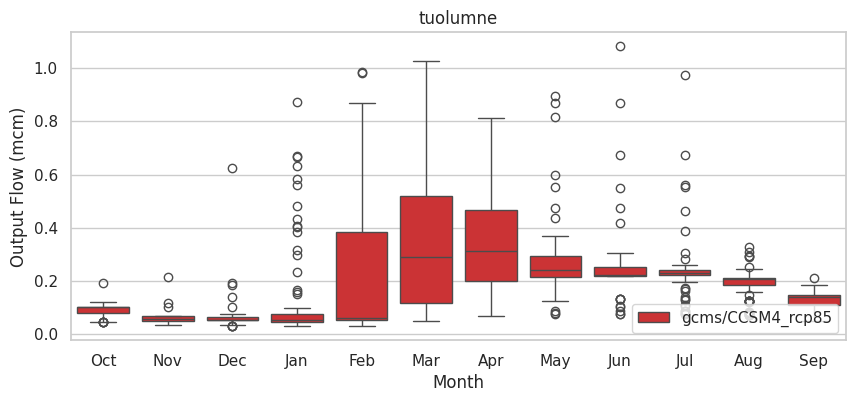

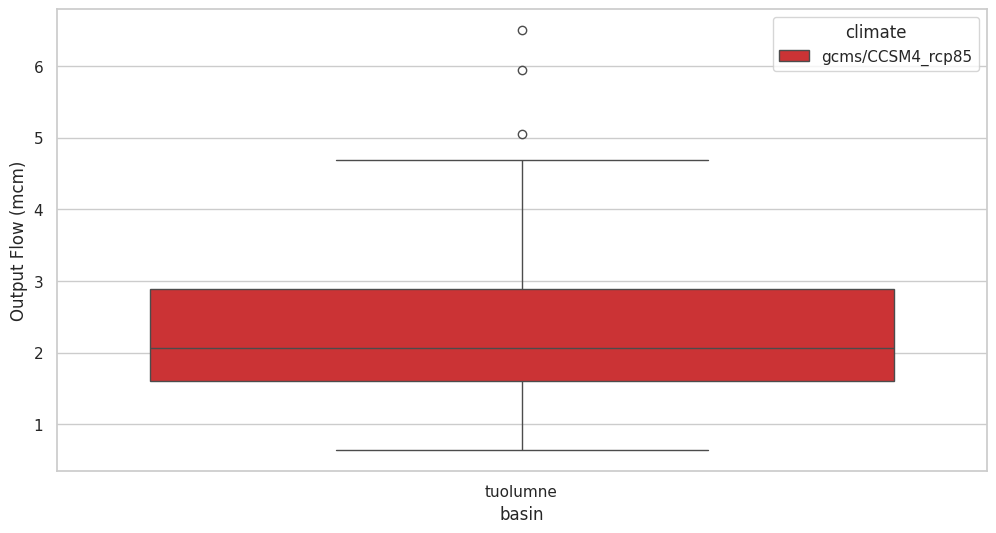

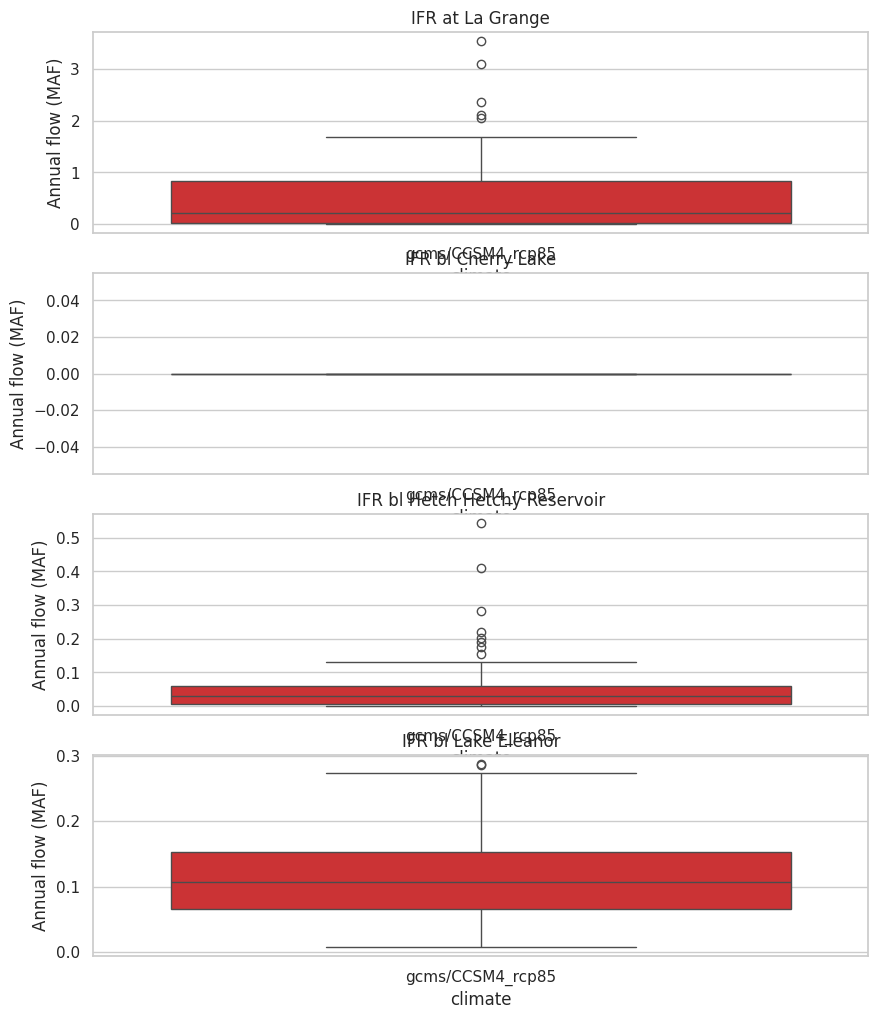

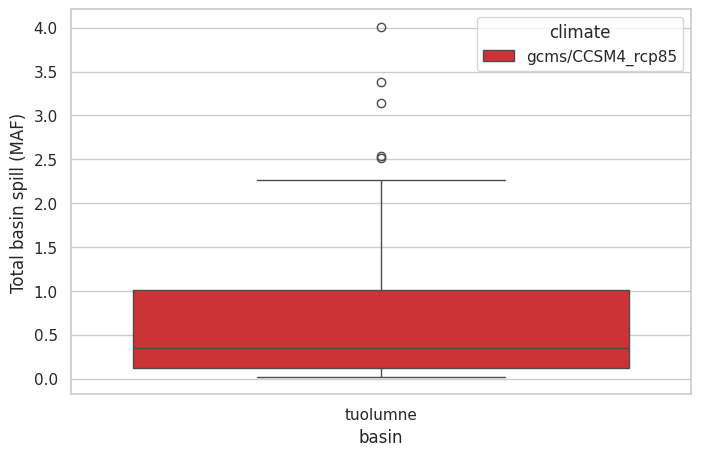

In [ ]:
##################################### PLOT ######################################
#################################################################################
# Plot the following:
# [1] Hydropower_Generation_MWh            # only for Stanslus and Sa Joaquin
# [2] Hydropower_Flow_mcm
# [3] Reservoir_Elevation_m
# [4] PiecewiseLink_Flow_mcm
# [5] Link_Flow_mcm
# [6] InstreamFlowRequirement_Water Year Type_mcm
# [7] Other_Flow_mcm
# [8] Output_Flow_mcm

variable = 'Output_Flow_mcm'
figname = None


### Figure: generate the basic charts
create_basic_charts(variable, figname=None)


### Figure: generate the spill
create_spill_charts()
